In [1]:
import pandas as pd

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv',  dtype=pd.Int64Dtype()).rename(columns=lambda x: x.replace('.', ' '))

In [3]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
# (2) выведите, что за типы переменных, сколько пропусков,

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  Int64
 1   LIMIT_BAL                   30000 non-null  Int64
 2   SEX                         30000 non-null  Int64
 3   EDUCATION                   30000 non-null  Int64
 4   MARRIAGE                    30000 non-null  Int64
 5   AGE                         30000 non-null  Int64
 6   PAY_0                       30000 non-null  Int64
 7   PAY_2                       30000 non-null  Int64
 8   PAY_3                       30000 non-null  Int64
 9   PAY_4                       30000 non-null  Int64
 10  PAY_5                       30000 non-null  Int64
 11  PAY_6                       30000 non-null  Int64
 12  BILL_AMT1                   30000 non-null  Int64
 13  BILL_AMT2                   30000 non-null  Int64
 14  BILL_A

Значения Int64 (Nullable) пропусков нет

In [6]:
# для численных значений посчитайте пару статистик (в свободной форме)
df[['AGE', 'PAY_AMT1']].max()

AGE             79
PAY_AMT1    873552
dtype: int64

In [7]:
df['AGE'].mean()

35.4855

In [8]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

df[(df['SEX'] == 2) & (df['EDUCATION'] == 2)].shape[0]

8656

In [9]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
df.filter(regex='(BILL_|PAY_|default)', axis=1).groupby('default payment next month').median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000,1734,1765,1706
1,1,0,0,0,0,0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222,1000,1000,1000


In [10]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE
df.pivot_table(values='ID', index='EDUCATION', columns=['SEX', 'MARRIAGE'], aggfunc='count')

SEX           1                           2                      
MARRIAGE      0       1       2     3     0       1       2     3
EDUCATION                                                        
0           NaN     2.0     6.0   NaN   NaN     2.0     4.0   NaN
1           1.0  1690.0  2633.0  30.0   3.0  2032.0  4176.0  20.0
2           1.0  2370.0  2940.0  63.0   5.0  4472.0  4080.0  99.0
3          12.0  1048.0   894.0  36.0  32.0  1813.0  1015.0  67.0
4           NaN    18.0    23.0   1.0   NaN    34.0    45.0   2.0
5           NaN    48.0    46.0   1.0   NaN   102.0    81.0   2.0
6           NaN    14.0    11.0   NaN   NaN    14.0    10.0   2.0

In [11]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

In [12]:
def map_func(x):
    chars = ['A', 'B', 'C', 'D', 'E', 'F']
    intervals = [10000, 100000, 200000, 400000, 700000]
    for i in range(len(intervals)):
        if x <= intervals[i]:
            return chars[i]
    return chars[-1]

df['LIMIT_CATEGORY'] = df['LIMIT_BAL'].map(map_func)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,LIMIT_CATEGORY
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,B
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,C
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,B
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,B
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,D
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,C
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,B
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,B


In [13]:
%matplotlib inline

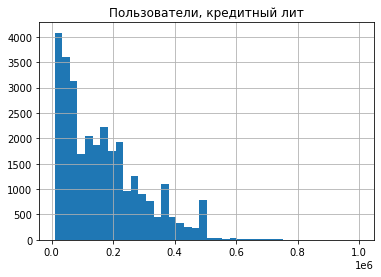

In [14]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)
import matplotlib.pyplot as plt

df['LIMIT_BAL'].hist(bins=40)
plt.title("Пользователи, кредитный лит");

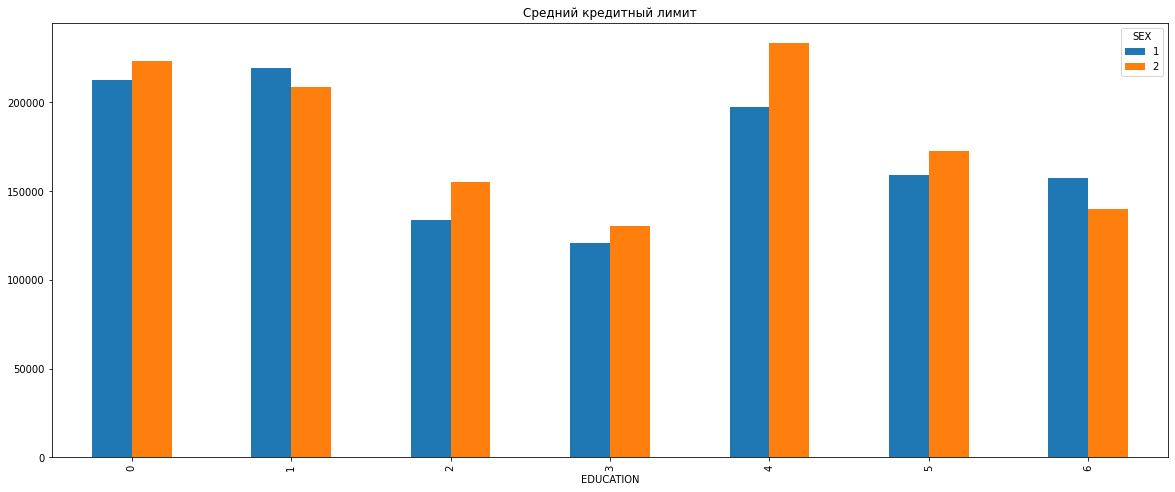

In [15]:
# (8) построить среднее значение кредитного лимита для каждого вида образования 
# и для каждого пола
# график необходимо сделать очень широким (на весь экран)
pt = df.pivot_table(values='LIMIT_BAL', index='EDUCATION', columns=['SEX'], aggfunc='mean')

_, ax = plt.subplots(figsize=(20,8))
pt.plot(kind='bar', ax=ax)
plt.title("Средний кредитный лимит");

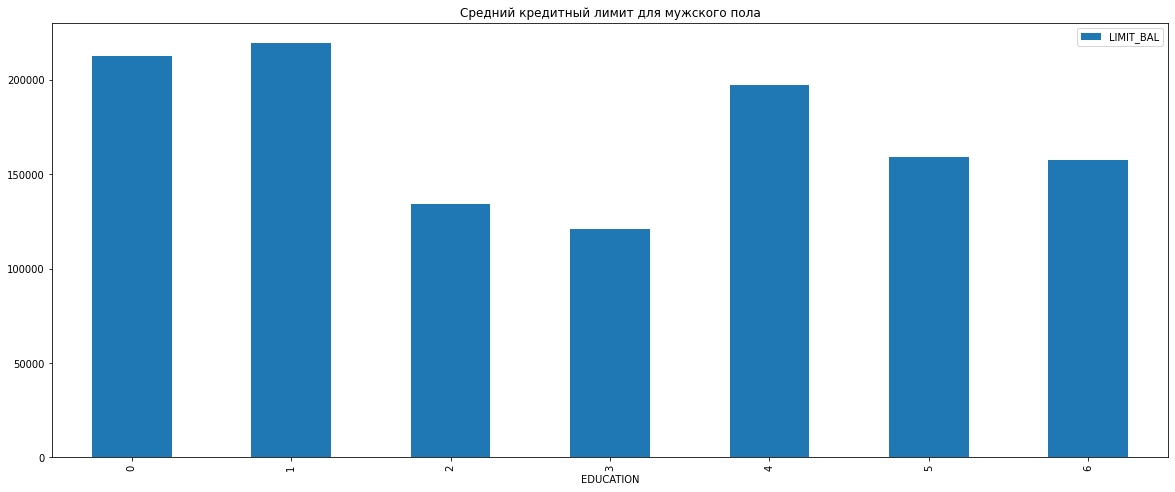

In [16]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
pt = df[df['SEX']==1].pivot_table(values='LIMIT_BAL', index='EDUCATION', aggfunc='mean')
_, ax = plt.subplots(figsize=(20,8))
pt.plot(kind='bar', ax=ax)
plt.legend()
plt.title("Средний кредитный лимит для мужского пола");

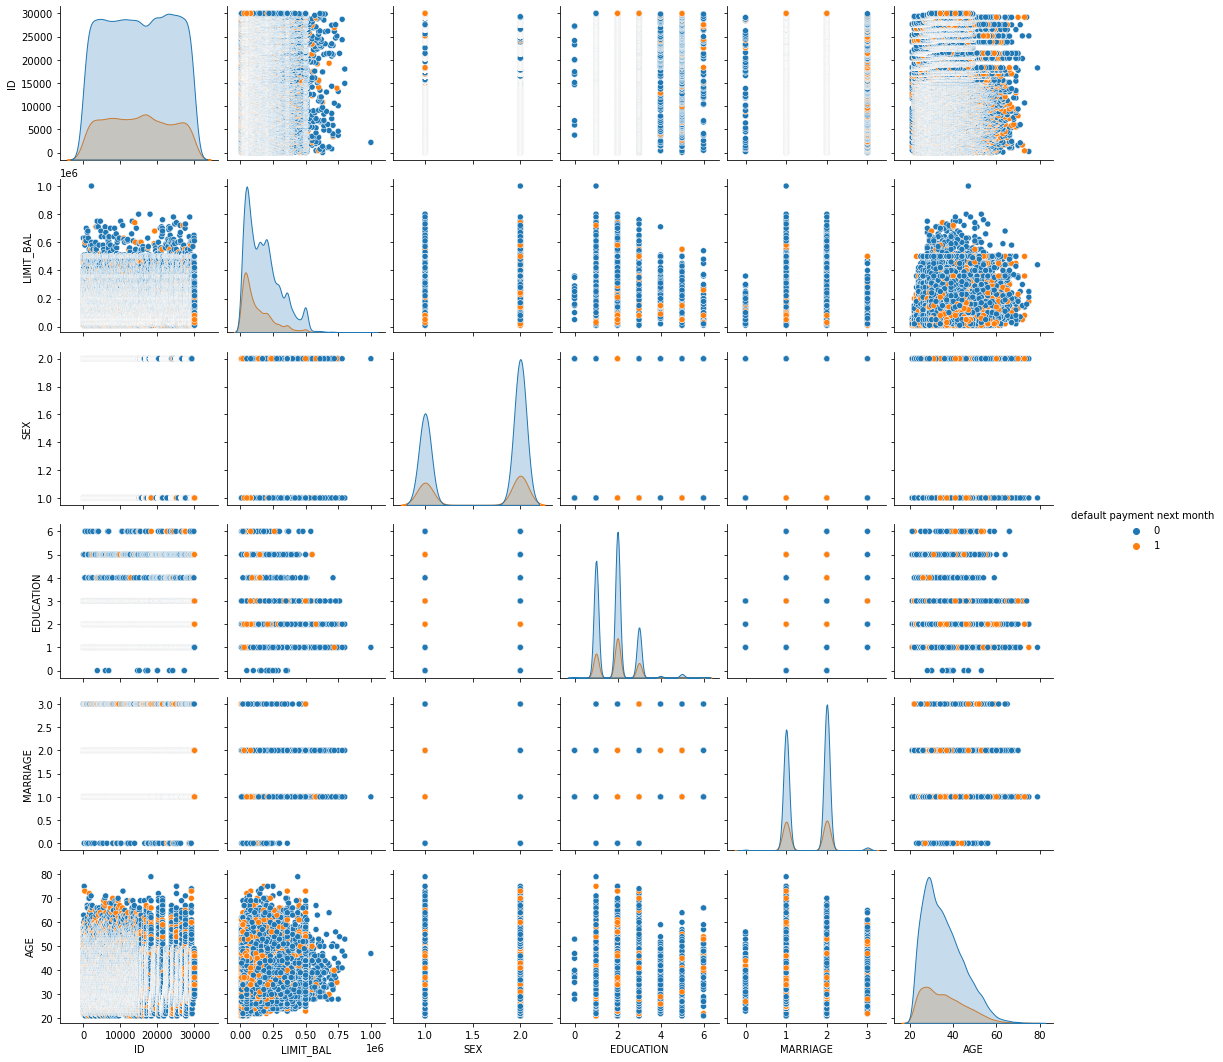

In [17]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns

df = pd.read_csv('UCI_Credit_Card.csv').rename(columns=lambda x: x.replace('.', ' '))

tmp = df.drop([
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
], axis=1)

sns.pairplot(
    tmp, 
    hue='default payment next month', 
    vars=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
)